# Data Science for Construction, Architecture and Engineering

### Week 3 - Construction - Pandas Time-Series Data

### Exercise Set 3.1 - Pandas Time-Series I

This set of exercises is related to the first half of Week 3 videos. Using the same data (Project Building Data Genome) and packages (Pandas) as in the videos, the following tasks about time-series data will be tested: read, resample, truncate and plot.

There is an introduction video available to explain the process of using this exercise video.

The lead developer of this exercise is James Zhan Sicheng, a Ph.D. student at NUS and a teaching assistant of this course. 

#### Setup the environment
The cell below is used to load the necessary packages for this exercise and setup the working directory. You will be asked to give the google drive authorization using through a given link.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
#drive.mount('/content/gdrive')

In order to do the following exercises, we will go ahead and load the `meta` data file. Please note that we're using the `os` library again to navigate our file struture to *change the directory* to find the right files.

**Important Note** - if you file structure is different than what you see below, then you will get an error. You will need to change your file locations *or* update the file path

In [3]:
# read meta data file as pandas dataframe and assign to the corresponding variables
#os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/Week 3 - Construction - Pandas Fundamentals/")
metadata = pd.read_csv('all_buildings_meta_data.csv')

In [4]:
#os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/Week 3 - Construction - Pandas Fundamentals/meter_data/")

In [5]:
metadata

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
0,PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0000,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
1,UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0000,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
2,Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0000,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
3,Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0000,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
4,PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0000,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Office_Lane,30/11/15 23:00,01/12/14 00:00,NaN,Heat network,Education,Heat Network,8.0,NaN,Office,NaN,34455.2439,3201.000000,College/University,Europe/London,1907,Lane,Office,weather5.csv
503,Office_Cameron,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,53303.0000,4952.008609,College/University,America/New_York,1981,Cameron,Office,weather2.csv
504,UnivLab_Lea,30/11/15 23:00,01/12/14 00:00,NaN,Gas,Education,Gas,6.0,NaN,College Laboratory,NaN,16802.4479,1561.000000,College/University,Europe/London,1995,Lea,UnivLab,weather5.csv
505,UnivLab_Carlos,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,30143.0000,2800.375129,College/University,America/New_York,1951,Carlos,UnivLab,weather2.csv


### Exercise 03.1.1 - Loading Meter Data from Specific Files

Sometimes you need to grab and process data only from certain files to analyze. You want to filter those buildings that have certain attributes.


To get you started, we have provided a bit of code to help filter the names of several buildings that we want to focus on. This code:
- Reads the metadata as a Pandas DataFrame
- Identifies the `uid` of buildings located in **London (under weather 5)**, belonging to **Education** `industry` and having floor area larger than **10000** `sqm`

In [6]:
# Filter the dataframe with the three conditions ( the '&' sign means all the three conditions need to be satistified)
filtered = metadata[(metadata['newweatherfilename']=='weather5.csv')&(metadata['industry']=='Education')&(metadata['sqm']>10000)]
list_of_buildings = filtered['uid']
print(list_of_buildings)

292    Office_Lillian
432      UnivLab_Lyle
475    UnivLab_Lester
Name: uid, dtype: object


In this exercise, use the `read_csv` function to read the following time-series data as Pandas DataFrame: 
1. The meter data files of the three identified building in the `list_of_buildings`; 
2. The corresponding weather data (`weather5.csv`)

Tips:
- Set the timestamp column as index (`index_col`)
- Have the timestamp as datetime data type (`parse_dates`)
- Keep only the `TemperatureC` and `Humidity` for weather data (`usecols`)

Create a DataFrame called `all_data` that holds the data from all the buildings and a DataFrame called `weather` that holds the weather data

Hint: the `weather5.csv` file is in a different folder and the meter file names need a `.csv` in addition to the name in order to be loaded

In [7]:
meter1 = pd.read_csv("Office_Lillian.csv",index_col=['timestamp'], parse_dates=['timestamp'])
meter2 = pd.read_csv("UnivLab_Lyle.csv",index_col=['timestamp'], parse_dates=['timestamp'])
meter3 = pd.read_csv("UnivLab_Lester.csv",index_col=['timestamp'], parse_dates=['timestamp'])

In [8]:
meter1

,Office_Lillian
timestamp,
2014-12-01 00:00:00,105.8
2014-12-01 01:00:00,104.1
2014-12-01 02:00:00,102.9
2014-12-01 03:00:00,104.1
2014-12-01 04:00:00,104.7
...,...
2015-11-30 19:00:00,194.3
2015-11-30 20:00:00,142.1
2015-11-30 21:00:00,125.4


In [9]:
meter2

,UnivLab_Lyle
timestamp,
2014-12-01 00:00:00,237.665476
2014-12-01 01:00:00,224.465476
2014-12-01 02:00:00,229.065476
2014-12-01 03:00:00,229.265476
2014-12-01 04:00:00,231.465476
...,...
2015-11-30 19:00:00,405.800000
2015-11-30 20:00:00,345.600000
2015-11-30 21:00:00,307.800000


In [10]:
meter3

,UnivLab_Lester
timestamp,
2014-12-01 00:00:00,475.2
2014-12-01 01:00:00,472.8
2014-12-01 02:00:00,452.4
2014-12-01 03:00:00,475.8
2014-12-01 04:00:00,459.8
...,...
2015-11-30 19:00:00,631.5
2015-11-30 20:00:00,633.0
2015-11-30 21:00:00,617.5


In [11]:
all_data = pd.concat([meter1,meter2,meter3],axis=1)

In [12]:
all_data

,Office_Lillian,UnivLab_Lyle,UnivLab_Lester
timestamp,,,
2014-12-01 00:00:00,105.8,237.665476,475.2
2014-12-01 01:00:00,104.1,224.465476,472.8
2014-12-01 02:00:00,102.9,229.065476,452.4
2014-12-01 03:00:00,104.1,229.265476,475.8
2014-12-01 04:00:00,104.7,231.465476,459.8
...,...,...,...
2015-11-30 19:00:00,194.3,405.800000,631.5
2015-11-30 20:00:00,142.1,345.600000,633.0
2015-11-30 21:00:00,125.4,307.800000,617.5


In [13]:
weather = pd.read_csv("weather5.csv",index_col=['timestamp'], parse_dates=['timestamp'], usecols=['timestamp','Humidity','TemperatureC'])
weather

,Humidity,TemperatureC
timestamp,,
2014-12-01 00:20:00,82,10.0
2014-12-01 00:50:00,82,9.0
2014-12-01 01:20:00,82,9.0
2014-12-01 01:50:00,82,9.0
2014-12-01 02:20:00,76,9.0
...,...,...
2015-11-30 21:50:00,88,13.0
2015-11-30 22:20:00,88,13.0
2015-11-30 22:50:00,88,13.0


In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17227 entries, 2014-12-01 00:20:00 to 2015-11-30 23:50:00
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      17227 non-null  int64  
 1   TemperatureC  17227 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 403.8 KB


### Exercise 03.1.2 - Resampling Data

As discussed in the videos, very often your IoT data will be at a higher resolution than what you need. In a spreadsheet, dealing with this issue can be tricky. With `Pandas`, its much more straightforward.

In this exercise, use the DataFrames of meter and weather data you created to: 
1. Calculate the monthly total consumptions and save in its own DataFrame called `all_data_monthly`
2. Find the average consumption for the three buildings 
2. Resample the outdoor temperature (`temperatureC`) and humidity (`Humidity`) in the weather data to hourly resolution and store in a DataFrame labelled `weather_hourly`

Hint: the Pandas `resample` function can be used to do the basic calculation (e.g. `mean`, `sum`) at different time resolution (e.g. `'H'`, `'M'`)

In [15]:
all_data

,Office_Lillian,UnivLab_Lyle,UnivLab_Lester
timestamp,,,
2014-12-01 00:00:00,105.8,237.665476,475.2
2014-12-01 01:00:00,104.1,224.465476,472.8
2014-12-01 02:00:00,102.9,229.065476,452.4
2014-12-01 03:00:00,104.1,229.265476,475.8
2014-12-01 04:00:00,104.7,231.465476,459.8
...,...,...,...
2015-11-30 19:00:00,194.3,405.800000,631.5
2015-11-30 20:00:00,142.1,345.600000,633.0
2015-11-30 21:00:00,125.4,307.800000,617.5


In [16]:
all_data.index

DatetimeIndex(['2014-12-01 00:00:00', '2014-12-01 01:00:00',
               '2014-12-01 02:00:00', '2014-12-01 03:00:00',
               '2014-12-01 04:00:00', '2014-12-01 05:00:00',
               '2014-12-01 06:00:00', '2014-12-01 07:00:00',
               '2014-12-01 08:00:00', '2014-12-01 09:00:00',
               ...
               '2015-11-30 14:00:00', '2015-11-30 15:00:00',
               '2015-11-30 16:00:00', '2015-11-30 17:00:00',
               '2015-11-30 18:00:00', '2015-11-30 19:00:00',
               '2015-11-30 20:00:00', '2015-11-30 21:00:00',
               '2015-11-30 22:00:00', '2015-11-30 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=8760, freq=None)

In [17]:
all_data.loc['2015']

,Office_Lillian,UnivLab_Lyle,UnivLab_Lester
timestamp,,,
2015-01-01 00:00:00,50.1,109.8,445.3175
2015-01-01 01:00:00,102.1,217.0,418.0000
2015-01-01 02:00:00,99.9,213.0,412.5000
2015-01-01 03:00:00,102.7,209.4,423.5000
2015-01-01 04:00:00,99.8,210.2,410.0000
...,...,...,...
2015-11-30 19:00:00,194.3,405.8,631.5000
2015-11-30 20:00:00,142.1,345.6,633.0000
2015-11-30 21:00:00,125.4,307.8,617.5000


In [18]:
all_data.loc['2014']

,Office_Lillian,UnivLab_Lyle,UnivLab_Lester
timestamp,,,
2014-12-01 00:00:00,105.8,237.665476,475.2
2014-12-01 01:00:00,104.1,224.465476,472.8
2014-12-01 02:00:00,102.9,229.065476,452.4
2014-12-01 03:00:00,104.1,229.265476,475.8
2014-12-01 04:00:00,104.7,231.465476,459.8
...,...,...,...
2014-12-31 19:00:00,120.2,260.000000,539.6
2014-12-31 20:00:00,107.3,237.000000,526.2
2014-12-31 21:00:00,105.9,224.800000,515.9


In [19]:
all_data_df = all_data.reset_index()

In [20]:
all_data_df

,timestamp,Office_Lillian,UnivLab_Lyle,UnivLab_Lester
0,2014-12-01 00:00:00,105.8,237.665476,475.2
1,2014-12-01 01:00:00,104.1,224.465476,472.8
2,2014-12-01 02:00:00,102.9,229.065476,452.4
3,2014-12-01 03:00:00,104.1,229.265476,475.8
4,2014-12-01 04:00:00,104.7,231.465476,459.8
...,...,...,...,...
8755,2015-11-30 19:00:00,194.3,405.800000,631.5
8756,2015-11-30 20:00:00,142.1,345.600000,633.0
8757,2015-11-30 21:00:00,125.4,307.800000,617.5
8758,2015-11-30 22:00:00,107.3,290.600000,589.5


In [21]:
all_data_df['Month'] = pd.DatetimeIndex(all_data_df['timestamp']).month

In [22]:
all_data_df

,timestamp,Office_Lillian,UnivLab_Lyle,UnivLab_Lester,Month
0,2014-12-01 00:00:00,105.8,237.665476,475.2,12
1,2014-12-01 01:00:00,104.1,224.465476,472.8,12
2,2014-12-01 02:00:00,102.9,229.065476,452.4,12
3,2014-12-01 03:00:00,104.1,229.265476,475.8,12
4,2014-12-01 04:00:00,104.7,231.465476,459.8,12
...,...,...,...,...,...
8755,2015-11-30 19:00:00,194.3,405.800000,631.5,11
8756,2015-11-30 20:00:00,142.1,345.600000,633.0,11
8757,2015-11-30 21:00:00,125.4,307.800000,617.5,11
8758,2015-11-30 22:00:00,107.3,290.600000,589.5,11


In [23]:
all_data_monthly = all_data_df.groupby(['Month']).sum()

In [24]:
all_data_monthly

,Office_Lillian,UnivLab_Lyle,UnivLab_Lester
Month,,,
1,140958.600000,255337.600000,372392.5175
2,133440.500000,251912.387500,339885.6000
3,139736.100000,265455.800000,379929.5000
4,124041.600000,216346.000000,357501.8700
5,126779.340255,199045.018469,390839.1125
6,130783.400000,196926.600000,434452.5000
7,142399.177500,213708.800000,483563.9500
8,132097.400000,179889.000000,478420.7600
9,120476.800000,200934.900000,416940.5000


In [25]:
len(all_data)

8760

In [26]:
office_lillian_avg = all_data["Office_Lillian"].sum()/len(all_data)
office_lillian_avg

179.40225088528564

In [27]:
unilab_lyle_avg = all_data["UnivLab_Lyle"].sum()/len(all_data)
unilab_lyle_avg

310.7312742191622

In [28]:
unilab_lester_avg = all_data["UnivLab_Lester"].sum()/len(all_data)
unilab_lester_avg

560.1201038812792

In [29]:
weather_hourly = weather.resample("H")

In [30]:
weather_hourly

In [31]:
list(weather_hourly)

[(Timestamp('2014-12-01 00:00:00', freq='H'),
                       Humidity  TemperatureC
  timestamp                                  
  2014-12-01 00:20:00        82          10.0
  2014-12-01 00:50:00        82           9.0),
 (Timestamp('2014-12-01 01:00:00', freq='H'),
                       Humidity  TemperatureC
  timestamp                                  
  2014-12-01 01:20:00        82           9.0
  2014-12-01 01:50:00        82           9.0),
 (Timestamp('2014-12-01 02:00:00', freq='H'),
                       Humidity  TemperatureC
  timestamp                                  
  2014-12-01 02:20:00        76           9.0
  2014-12-01 02:50:00        76           9.0),
 (Timestamp('2014-12-01 03:00:00', freq='H'),
                       Humidity  TemperatureC
  timestamp                                  
  2014-12-01 03:20:00        76           9.0
  2014-12-01 03:50:00        81           8.0),
 (Timestamp('2014-12-01 04:00:00', freq='H'),
                       Hum

In [32]:
weather.resample("H").first()

,Humidity,TemperatureC
timestamp,,
2014-12-01 00:00:00,82.0,10.0
2014-12-01 01:00:00,82.0,9.0
2014-12-01 02:00:00,76.0,9.0
2014-12-01 03:00:00,76.0,9.0
2014-12-01 04:00:00,76.0,8.0
...,...,...
2015-11-30 19:00:00,77.0,14.0
2015-11-30 20:00:00,NaN,NaN
2015-11-30 21:00:00,88.0,13.0


In [33]:
weather_hourly = weather.resample("H").first()

In [34]:
weather_hourly

,Humidity,TemperatureC
timestamp,,
2014-12-01 00:00:00,82.0,10.0
2014-12-01 01:00:00,82.0,9.0
2014-12-01 02:00:00,76.0,9.0
2014-12-01 03:00:00,76.0,9.0
2014-12-01 04:00:00,76.0,8.0
...,...,...
2015-11-30 19:00:00,77.0,14.0
2015-11-30 20:00:00,NaN,NaN
2015-11-30 21:00:00,88.0,13.0


### Exercise 03.1.3 - Plotting 

One of the most useful things to do in the early phase of the data analysis process is to visualize the data to find interesting behavior, outliers, etc.

In this exercise, use the Pandas `truncate` and `plot` function to plot the hourly temperature and energy consumption trend of `UnivLab_Lester` for the month of January 2015.

Here are some tips that you can use in your code:
- The `truncate` function returns the dataframe between the `before` and `after` date
- The pandas `plot` function returns a `matplotlib.axes.Axes` object, which can be referred to as place to plot
- The temperature and energy data are in different range. Therefore, it is better to have two y axis (`ax`), so that the both trends are clearly shown
- Try to differentiate the two lines with both `color` and `linestyle`
- A proper `legend` makes a plot with more than one lines more legible
- Axis ticks of larger `fontsize` are also preferred

In [35]:
all_data

,Office_Lillian,UnivLab_Lyle,UnivLab_Lester
timestamp,,,
2014-12-01 00:00:00,105.8,237.665476,475.2
2014-12-01 01:00:00,104.1,224.465476,472.8
2014-12-01 02:00:00,102.9,229.065476,452.4
2014-12-01 03:00:00,104.1,229.265476,475.8
2014-12-01 04:00:00,104.7,231.465476,459.8
...,...,...,...
2015-11-30 19:00:00,194.3,405.800000,631.5
2015-11-30 20:00:00,142.1,345.600000,633.0
2015-11-30 21:00:00,125.4,307.800000,617.5


In [36]:
all_data.drop(['Office_Lillian','UnivLab_Lyle'],axis=1,inplace=True)

In [37]:
all_data

,UnivLab_Lester
timestamp,
2014-12-01 00:00:00,475.2
2014-12-01 01:00:00,472.8
2014-12-01 02:00:00,452.4
2014-12-01 03:00:00,475.8
2014-12-01 04:00:00,459.8
...,...
2015-11-30 19:00:00,631.5
2015-11-30 20:00:00,633.0
2015-11-30 21:00:00,617.5


In [38]:
lester = all_data.resample("H", kind='period').mean()
lester

,UnivLab_Lester
timestamp,
2014-12-01 00:00,475.2
2014-12-01 01:00,472.8
2014-12-01 02:00,452.4
2014-12-01 03:00,475.8
2014-12-01 04:00,459.8
...,...
2015-11-30 19:00,631.5
2015-11-30 20:00,633.0
2015-11-30 21:00,617.5


In [39]:
lester.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 8760 entries, 2014-12-01 00:00 to 2015-11-30 23:00
Freq: H
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UnivLab_Lester  8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [40]:
lester.index[0]

Period('2014-12-01 00:00', 'H')

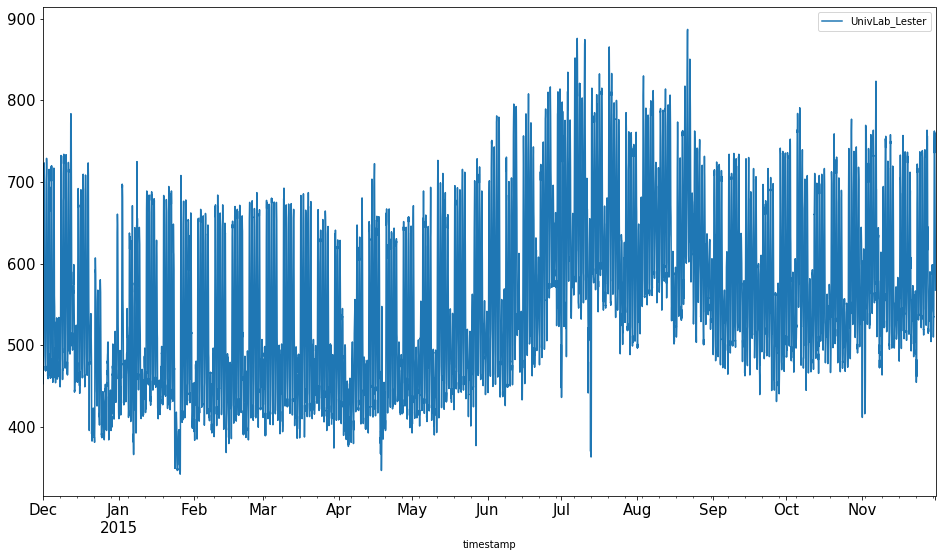

In [41]:
lester.plot(figsize=(16,9),fontsize=15)
plt.show()

In [42]:
weather_hourly

,Humidity,TemperatureC
timestamp,,
2014-12-01 00:00:00,82.0,10.0
2014-12-01 01:00:00,82.0,9.0
2014-12-01 02:00:00,76.0,9.0
2014-12-01 03:00:00,76.0,9.0
2014-12-01 04:00:00,76.0,8.0
...,...,...
2015-11-30 19:00:00,77.0,14.0
2015-11-30 20:00:00,NaN,NaN
2015-11-30 21:00:00,88.0,13.0


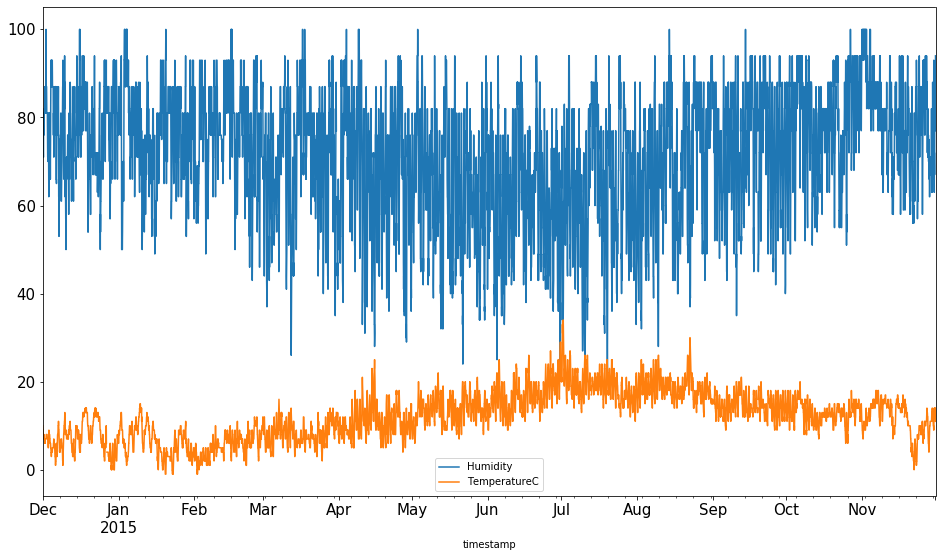

In [43]:
weather_hourly.plot(figsize=(16,9),fontsize=15)
plt.show()

In [44]:
january2015 = weather_hourly.loc["2015-01-01":"2015-01-31"]

In [45]:
january2015

,Humidity,TemperatureC
timestamp,,
2015-01-01 00:00:00,76.0,6.0
2015-01-01 01:00:00,81.0,6.0
2015-01-01 02:00:00,81.0,7.0
2015-01-01 03:00:00,87.0,7.0
2015-01-01 04:00:00,81.0,8.0
...,...,...
2015-01-31 19:00:00,65.0,5.0
2015-01-31 20:00:00,57.0,5.0
2015-01-31 21:00:00,61.0,5.0


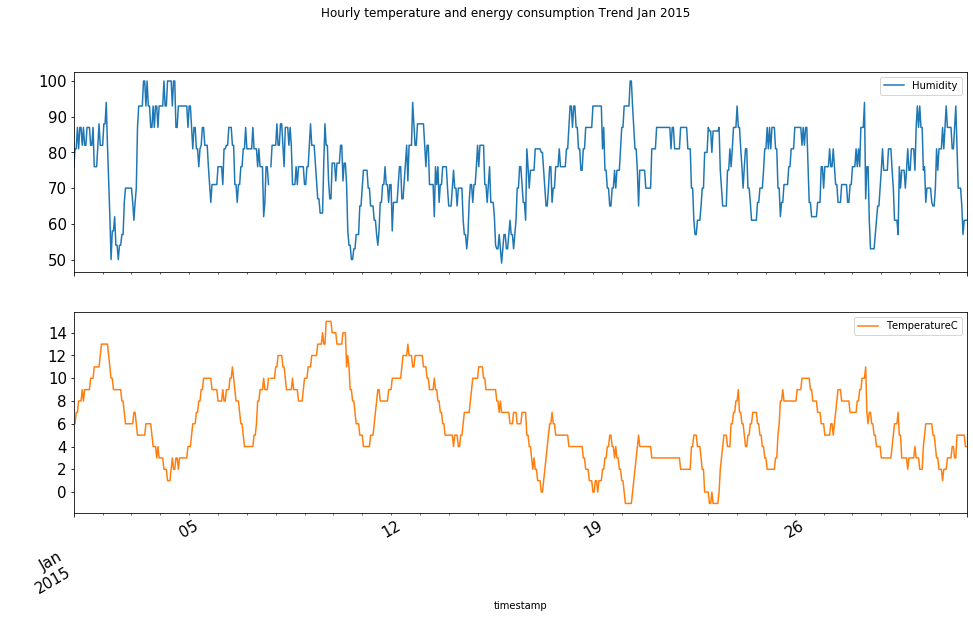

In [46]:
january2015.plot(title="Hourly temperature and energy consumption Trend Jan 2015", figsize=(16,9),
                 fontsize=15, subplots = True, layout=(2,1))
plt.show()